In [5]:
import mlcroissant as mlc
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"C:\Users\Utilizador\Downloads\amz_uk_price_prediction_dataset.csv")

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
df.shape

(2443651, 9)

In [16]:
# Count the number of True values (best-sellers) in each category
best_seller_counts = df.groupby('category')['isBestSeller'].sum()

# Display the result
best_seller_counts

category
3D Printers                         1
3D Printing & Scanning              2
Abrasive & Finishing Products       5
Action Cameras                      1
Adapters                            3
                                 ... 
Wind Instruments                    7
Window Treatments                   5
Women                             213
Women's Sports & Outdoor Shoes     20
eBook Readers & Accessories         0
Name: isBestSeller, Length: 296, dtype: int64

In [18]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result.head(20)

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
Agricultural Equipment & Supplies,8421,109
Alexa Built-In Devices,106,1
Art & Craft Supplies,253,5
Arts & Crafts,9319,230


In [20]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [22]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

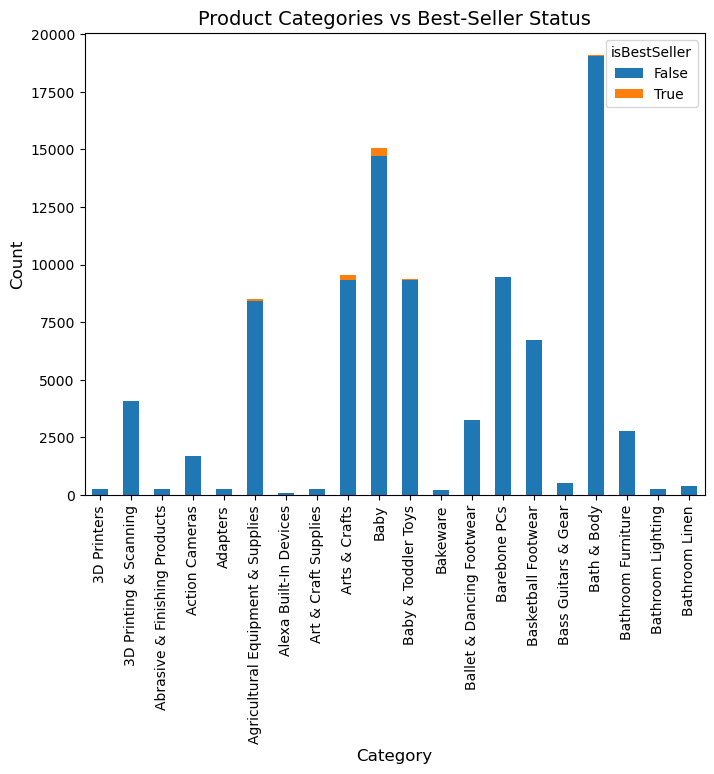

In [24]:
crosstab_result_20 = crosstab_result.head(20)
crosstab_result_20.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add titles and labels
plt.title('Product Categories vs Best-Seller Status', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

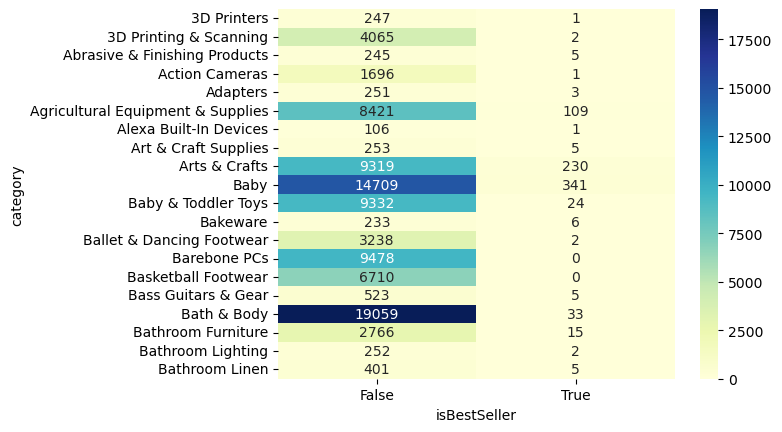

In [26]:
import seaborn as sns
sns.heatmap(crosstab_result_20, annot=True, cmap="YlGnBu", fmt="d")
plt.show()

In [28]:
def tukeys_test_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the specified column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
      # Debug: print the IQR and bounds
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    # Filter the dataframe to remove rows where the column values are outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

In [30]:
filterdf = tukeys_test_outliers(df, "price")

Q1: 9.99, Q3: 45.99, IQR: 36.0
Lower Bound: -44.01, Upper Bound: 99.99000000000001


In [32]:
filterdf.shape

(2115963, 9)

In [34]:
category_counts = filterdf['category'].value_counts()
top_10_categories = category_counts.head(10).index
filtered_df10 = filterdf[filterdf['category'].isin(top_10_categories)]

In [36]:
filtered_df10.shape

(862465, 9)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_39776\2704016774.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df10, x='price', y='category', palette="coolwarm")


<Axes: xlabel='price', ylabel='category'>

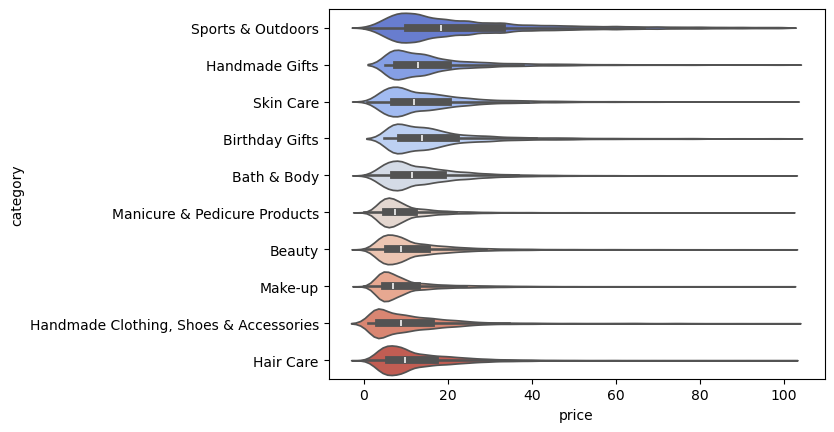

In [38]:
sns.violinplot(data=filtered_df10, x='price', y='category', palette="coolwarm")
plt.show()

In [40]:
# Calculate the median price for each category
category_medians = filterdf.groupby('category')['price'].median()

# Find the category with the highest median price
highest_median_category = category_medians.idxmax()
highest_median_price = category_medians.max()

print(f"The category with the highest median price is '{highest_median_category}' with a median price of {highest_median_price}.")

The category with the highest median price is 'Desktop PCs' with a median price of 74.0.


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_39776\2019248468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df10, x='price', y='category', palette="coolwarm")


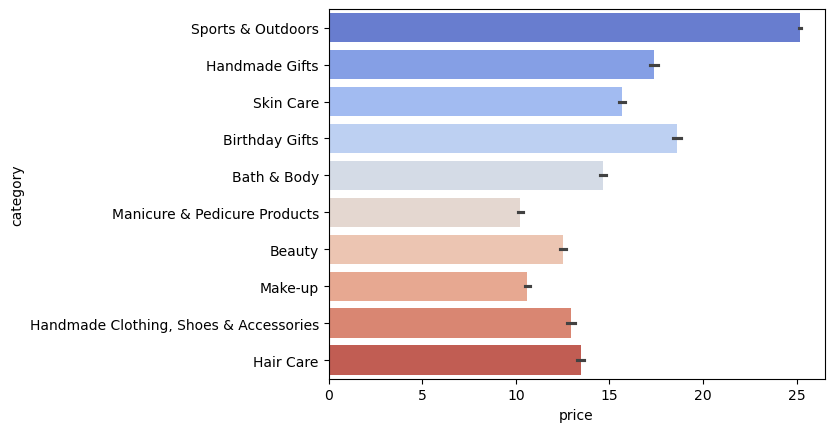

In [42]:
sns.barplot(data=filtered_df10, x='price', y='category', palette="coolwarm")
plt.show()

In [43]:
category_averages = filterdf.groupby('category')['price'].mean()

# Find the category with the highest average price
highest_avg_category = category_averages.idxmax()
highest_avg_price = category_averages.max()

print(f"The category with the highest average price is '{highest_avg_category}' with an average price of {highest_avg_price}.")

The category with the highest average price is 'Motherboards' with an average price of 68.77243243243242.


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_39776\1782685860.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df10, x='stars', y='category', palette="coolwarm")


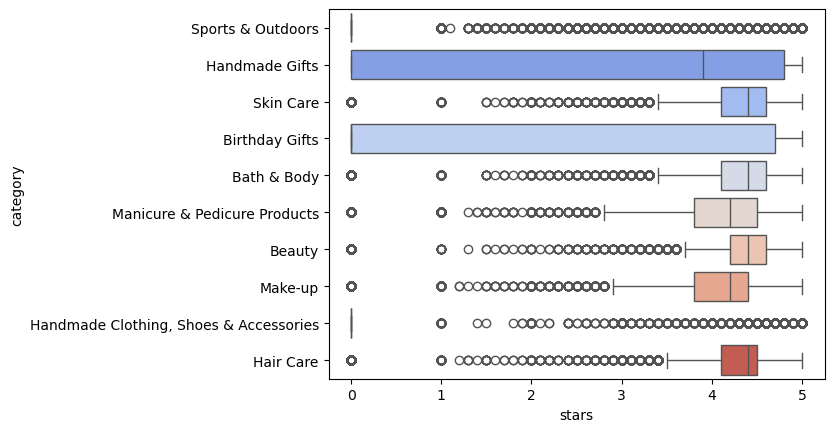

In [44]:
sns.boxplot(data=filtered_df10, x='stars', y='category', palette="coolwarm")
plt.show()

In [48]:
category_medians = filterdf.groupby('category')['stars'].median()

# Find the category with the highest median rating
highest_median_category = category_medians.idxmax()
highest_median_rating = category_medians.max()

print(f"The category with the highest median stars is '{highest_median_category}' with a median rating of {highest_median_rating}.")

The category with the highest median stars is 'Computer Memory' with a median rating of 4.7.


In [50]:
# part 3
# Calculating the Pearson correlation
correlation = filterdf['price'].corr(filterdf['stars'])
correlation

-0.0776729987818137

In [52]:
# Calculating the Spearman rank correlation 
correlation = filterdf['price'].corr(filterdf['stars'], method='spearman')
correlation

-0.06679697280768314

In [54]:
filterdf.shape

(2115963, 9)

In [56]:
filterdf1 = filterdf[filterdf.columns[filterdf.isnull().mean() < 0.8]]

In [57]:
potential_categorical_from_numerical = filterdf1.select_dtypes("number").loc[:, filterdf1.select_dtypes("number").nunique() < 1000000]
potential_categorical_from_numerical.shape

(2115963, 4)

In [60]:
# Calculating the Spearman correlation coefficients between 'SalePrice' and all other numerical variables
spearman_correlations = potential_categorical_from_numerical.corrwith(potential_categorical_from_numerical['price'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

price                1.000000
stars               -0.066797
reviews             -0.078127
boughtInLastMonth   -0.167260
dtype: float64

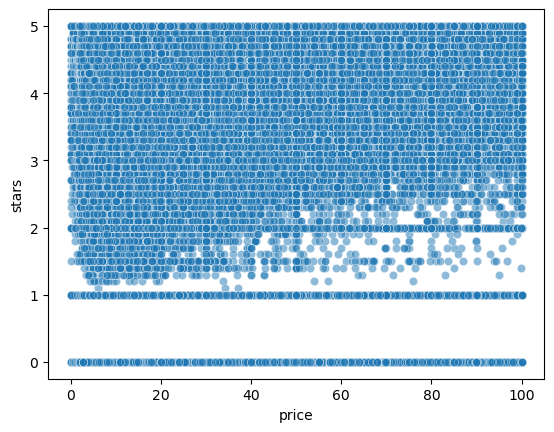

In [90]:
sns.scatterplot(data=filterdf, x='price', y='stars', alpha=0.5)
plt.show()

In [80]:
correlation_matrix

,stars,reviews,price,boughtInLastMonth
stars,1.000000,0.083920,-0.077673,0.113994
reviews,0.083920,1.000000,-0.008498,0.105624
price,-0.077673,-0.008498,1.000000,-0.059051
boughtInLastMonth,0.113994,0.105624,-0.059051,1.000000


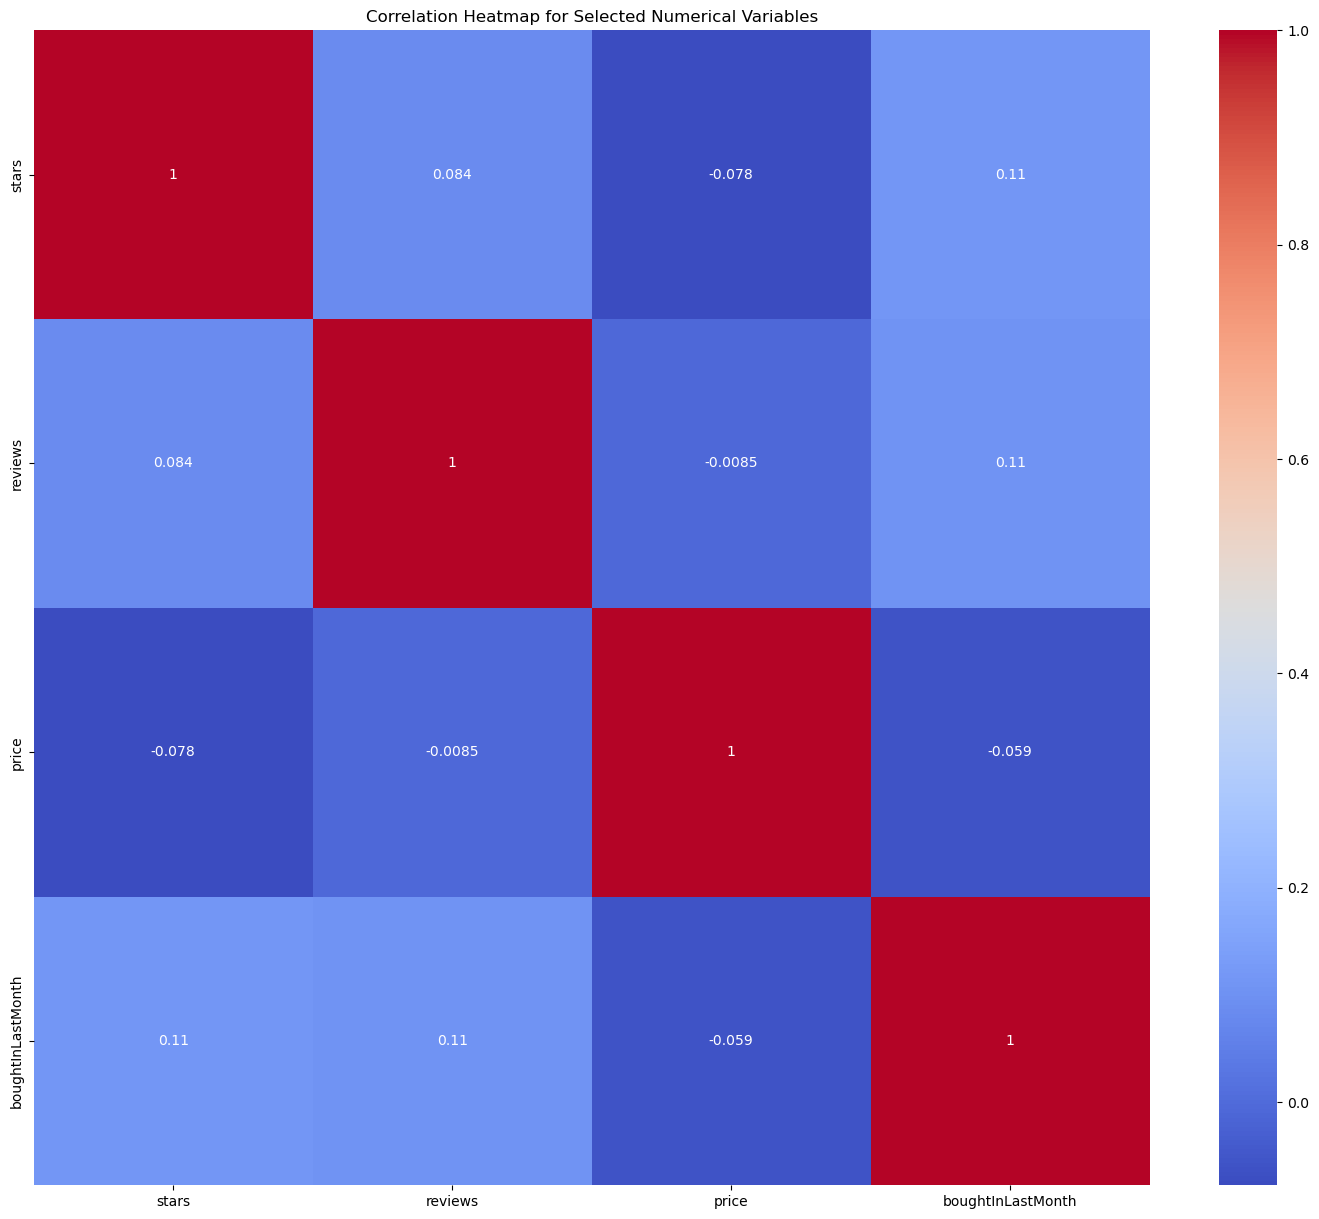

In [66]:
correlation_matrix = potential_categorical_from_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [ ]:
# The correlations in this table are all very weak, with none showing a strong or meaningful relationship. This suggests that the variables in this dataset are mostly independent of each other, with only marginal tendencies. 

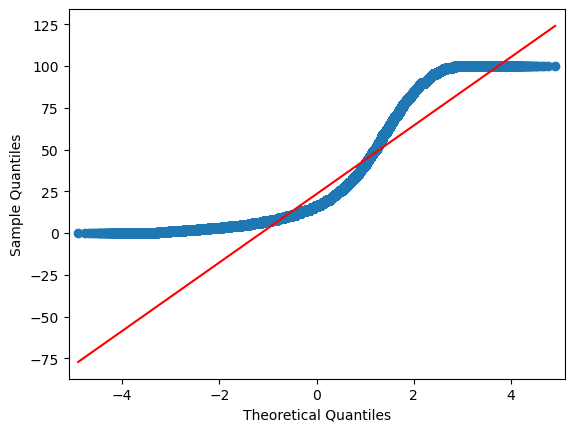

In [68]:
import statsmodels.api as sm
sm.qqplot(potential_categorical_from_numerical['price'], line='s')
plt.show()

In [ ]:
#The data does not perfectly follow a normal distribution. The heavy tails indicate the presence of outliers or a distribution with greater kurtosis than a normal distribution.